# Import Library & Data

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

In [44]:
raw_data = pd.read_csv('DataFolder/trainset.csv')
raw_data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,1575,1,999,nonexistent,5191.0,yes
1,49,entrepreneur,married,university.degree,yes,no,telephone,may,mon,1042,1,999,nonexistent,5191.0,yes
2,49,technician,married,basic.9y,no,no,telephone,may,mon,1467,1,999,nonexistent,5191.0,yes
3,41,technician,married,professional.course,yes,no,telephone,may,mon,579,1,999,nonexistent,5191.0,yes
4,45,blue-collar,married,basic.9y,yes,no,telephone,may,mon,461,1,999,nonexistent,5191.0,yes


# Data Cleaning Process

#### Data Exploration


In [45]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29271 entries, 0 to 29270
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          29271 non-null  int64  
 1   job          29271 non-null  object 
 2   marital      29271 non-null  object 
 3   education    29271 non-null  object 
 4   housing      29271 non-null  object 
 5   loan         29271 non-null  object 
 6   contact      29271 non-null  object 
 7   month        29271 non-null  object 
 8   day_of_week  29271 non-null  object 
 9   duration     29271 non-null  int64  
 10  campaign     29271 non-null  int64  
 11  pdays        29271 non-null  int64  
 12  poutcome     29271 non-null  object 
 13  nr.employed  29271 non-null  float64
 14  Subscribed   29271 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.3+ MB


In [46]:
# covert unknown Data to np.Nan
raw_data = raw_data.replace('unknown',np.nan)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29271 entries, 0 to 29270
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          29271 non-null  int64  
 1   job          29011 non-null  object 
 2   marital      29220 non-null  object 
 3   education    28044 non-null  object 
 4   housing      28558 non-null  object 
 5   loan         28558 non-null  object 
 6   contact      29271 non-null  object 
 7   month        29271 non-null  object 
 8   day_of_week  29271 non-null  object 
 9   duration     29271 non-null  int64  
 10  campaign     29271 non-null  int64  
 11  pdays        29271 non-null  int64  
 12  poutcome     29271 non-null  object 
 13  nr.employed  29271 non-null  float64
 14  Subscribed   29271 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.3+ MB


In [47]:
# Check Empty Data
raw_data["job"].unique()
raw_data.isna().sum()

age               0
job             260
marital          51
education      1227
housing         713
loan            713
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
poutcome          0
nr.employed       0
Subscribed        0
dtype: int64

In [48]:
#Check no of unknown
raw_data = raw_data.dropna(subset=["job","marital","education","housing","loan"])
raw_data.isna().sum()

age            0
job            0
marital        0
education      0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
poutcome       0
nr.employed    0
Subscribed     0
dtype: int64

In [49]:
#Data drop is around 7%. The remaining dataset is as follow
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27178 entries, 0 to 29270
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          27178 non-null  int64  
 1   job          27178 non-null  object 
 2   marital      27178 non-null  object 
 3   education    27178 non-null  object 
 4   housing      27178 non-null  object 
 5   loan         27178 non-null  object 
 6   contact      27178 non-null  object 
 7   month        27178 non-null  object 
 8   day_of_week  27178 non-null  object 
 9   duration     27178 non-null  int64  
 10  campaign     27178 non-null  int64  
 11  pdays        27178 non-null  int64  
 12  poutcome     27178 non-null  object 
 13  nr.employed  27178 non-null  float64
 14  Subscribed   27178 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.3+ MB


In [50]:
#Ratio on Subscribed
ratio =  (raw_data['Subscribed'].value_counts()['no']/raw_data['Subscribed'].value_counts().sum())*100
ratio

89.07204356464787

In [51]:
#CheckPoint
check_point = raw_data.copy()

#### Data Spiting

In [52]:
x = check_point.iloc[:,:-1]
y = check_point.iloc[:,-1]

In [53]:
#Regrouping all data to int data,nominal data, ordinary
x = x.loc[:,["age","duration","campaign","nr.employed","pdays",'month','day_of_week','job','marital','education','housing','loan','contact','poutcome']]
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27178 entries, 0 to 29270
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          27178 non-null  int64  
 1   duration     27178 non-null  int64  
 2   campaign     27178 non-null  int64  
 3   nr.employed  27178 non-null  float64
 4   pdays        27178 non-null  int64  
 5   month        27178 non-null  object 
 6   day_of_week  27178 non-null  object 
 7   job          27178 non-null  object 
 8   marital      27178 non-null  object 
 9   education    27178 non-null  object 
 10  housing      27178 non-null  object 
 11  loan         27178 non-null  object 
 12  contact      27178 non-null  object 
 13  poutcome     27178 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 3.1+ MB


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size= 0.2,random_state=20)

#### Data Handling


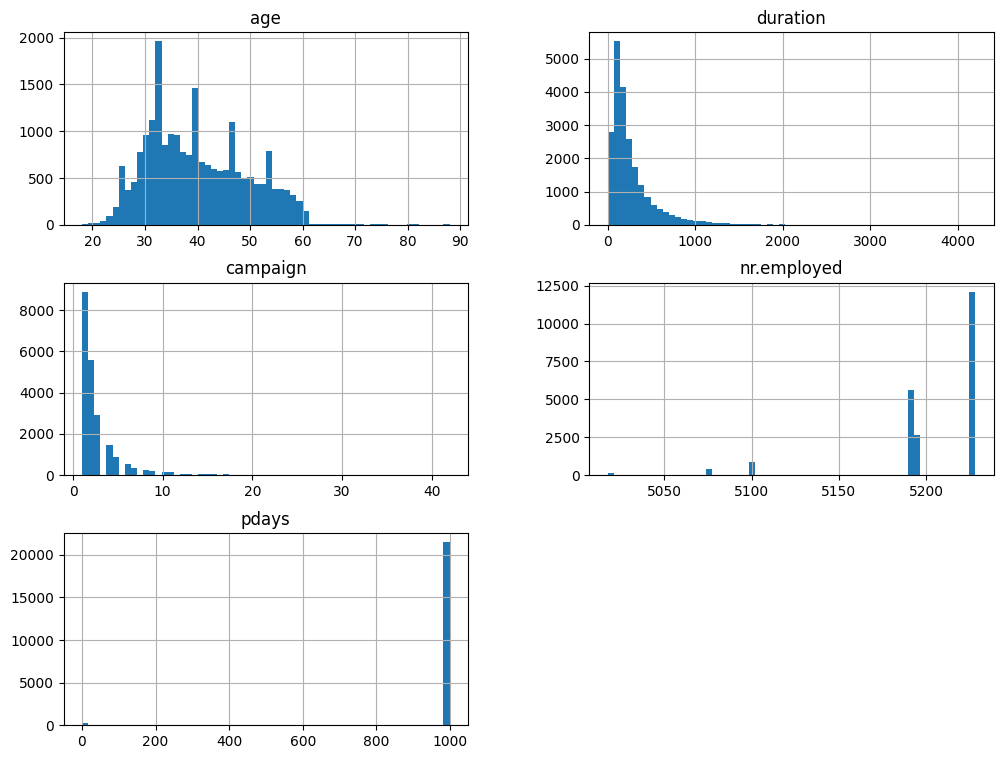

In [55]:
#Handling Outliner 
#Check Skew
x_train.hist(bins=60,figsize=(12,9))
plt.show()

In [68]:
# age, duration, campaign, nr.employed need to handle outliers 
int_column =["age","duration","campaign","nr.employed","pdays"]
int_data = x_train[int_column]
int_data

,age,duration,campaign,nr.employed,pdays
0,0.850847,0.119559,-0.563814,-0.399830,0.106535
1,-0.731518,-0.460025,-0.239061,0.625037,0.106535
2,1.800266,-0.393576,-0.563814,0.625037,0.106535
3,-1.047991,-0.079788,-0.239061,0.625037,0.106535
4,-1.047991,-0.260678,0.085692,0.625037,0.106535
...,...,...,...,...,...
21737,-0.731518,-0.556007,-0.239061,0.625037,0.106535
21738,-1.047991,-0.552316,0.735197,0.625037,0.106535
21739,-0.098572,0.293065,0.410444,-0.399830,0.106535
21740,-0.942500,-0.127779,-0.239061,-0.267233,0.106535


In [57]:
#Standarization
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(int_data)
int_data_scaled = std_scaler.transform(int_data)
df_int_std = pd.DataFrame(int_data_scaled, columns= int_data.columns)
df_int_std.head()

,age,duration,campaign,nr.employed,pdays
0,0.850847,0.119559,-0.563814,-0.399830,0.106535
1,-0.731518,-0.460025,-0.239061,0.625037,0.106535
2,1.800266,-0.393576,-0.563814,0.625037,0.106535
3,-1.047991,-0.079788,-0.239061,0.625037,0.106535
4,-1.047991,-0.260678,0.085692,0.625037,0.106535


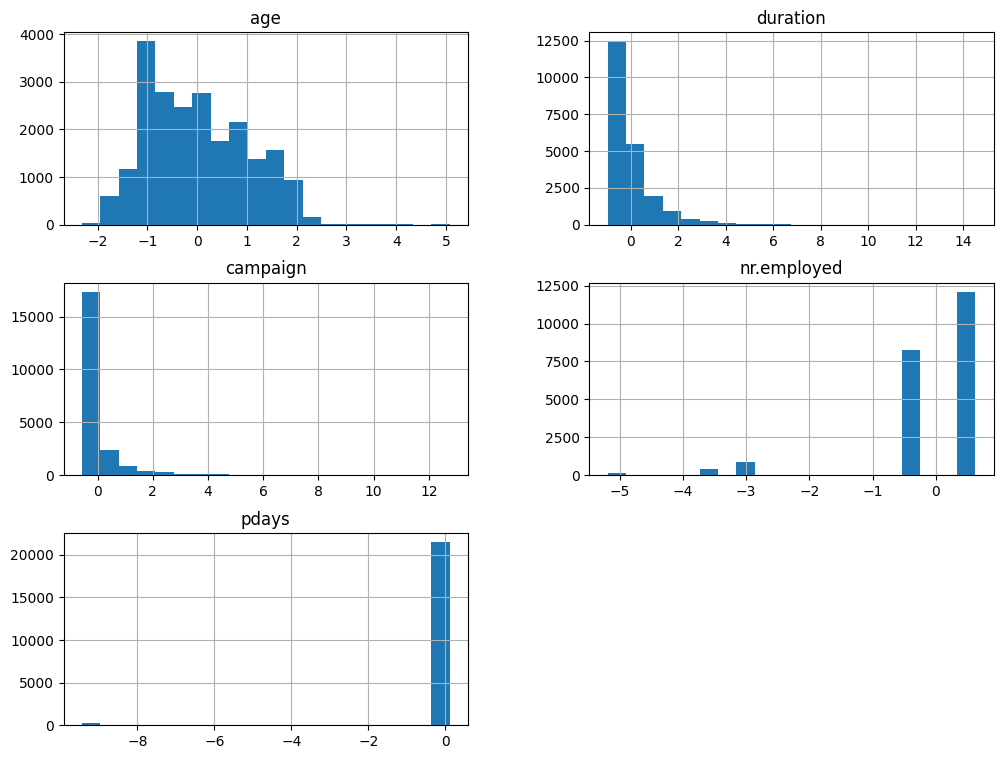

In [58]:
df_int_std.hist(bins=20,figsize=(12,9))
plt.show()

##### Converting Category index to int. Select Columns which need to encode, select columns with object data type

In [59]:
#
pd.Series({c: x_test[c].unique() for c in x_test.select_dtypes(include='object').columns})

month              [may, aug, jul, jun, nov, apr, mar, sep, oct]
day_of_week                            [fri, mon, wed, tue, thu]
job            [admin., technician, services, blue-collar, re...
marital                              [divorced, single, married]
education      [university.degree, high.school, professional....
housing                                                [yes, no]
loan                                                   [no, yes]
contact                                    [telephone, cellular]
poutcome                         [nonexistent, failure, success]
dtype: object

In [60]:
#Group with Ordinal and Nominal Data 
ordinal_column = ['month','day_of_week']
nominal_column = ['job','marital','education','housing','loan','contact','poutcome']
cat_ordinal = x_train[ordinal_column]
cat_nominal = x_train[nominal_column]
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21742 entries, 9230 to 17087
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          21742 non-null  int64  
 1   duration     21742 non-null  int64  
 2   campaign     21742 non-null  int64  
 3   nr.employed  21742 non-null  float64
 4   pdays        21742 non-null  int64  
 5   month        21742 non-null  object 
 6   day_of_week  21742 non-null  object 
 7   job          21742 non-null  object 
 8   marital      21742 non-null  object 
 9   education    21742 non-null  object 
 10  housing      21742 non-null  object 
 11  loan         21742 non-null  object 
 12  contact      21742 non-null  object 
 13  poutcome     21742 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 2.5+ MB


In [61]:
#Converting Ordinary data to array index using OrdinaryEncoder
from sklearn.preprocessing import OrdinalEncoder
ordinal_Encoder = OrdinalEncoder()
cat_ordinal_endcoded = ordinal_Encoder.fit_transform(cat_ordinal)
df_ordinal_endcoded = pd.DataFrame(cat_ordinal_endcoded,columns= cat_ordinal.columns)
df_ordinal_endcoded.astype(float)
df_ordinal_endcoded.head()

,month,day_of_week
0,6.0,3.0
1,4.0,4.0
2,1.0,0.0
3,3.0,1.0
4,3.0,4.0


In [62]:
#Converting Nominal data to array index using one hot encoder
from sklearn.preprocessing import OneHotEncoder
oneHotEncoder = OneHotEncoder()
oneHotEncoder.fit(cat_nominal)
cat_nominal_1hot = oneHotEncoder.transform(cat_nominal)

df_nominal_1hot = pd.DataFrame(cat_nominal_1hot.toarray(), columns=oneHotEncoder.get_feature_names_out())
df_nominal_1hot

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_university.degree,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
21738,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
21739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
21740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [63]:
#Converting Nominal data to array index using one hot encoder
YoneHotEncoder = OneHotEncoder()
cat_nominal_before_encode = pd.DataFrame(y_train)
cat_nominal_1hot = YoneHotEncoder.fit_transform(cat_nominal_before_encode)
df_y_train_result = pd.DataFrame(cat_nominal_1hot.toarray(),columns=YoneHotEncoder.categories_)
df_y_train_result.astype(float)

,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
21737,1.0,0.0
21738,1.0,0.0
21739,1.0,0.0
21740,1.0,0.0


In [64]:
# Concat all the standardize data and encoded data
x_train = pd.concat([df_int_std,df_ordinal_endcoded,df_nominal_1hot],axis = 1)

In [65]:
x_train.head()

,age,duration,campaign,nr.employed,pdays,month,day_of_week,job_admin.,job_blue-collar,job_entrepreneur,...,education_university.degree,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.850847,0.119559,-0.563814,-0.399830,0.106535,6.0,3.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.731518,-0.460025,-0.239061,0.625037,0.106535,4.0,4.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.800266,-0.393576,-0.563814,0.625037,0.106535,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.047991,-0.079788,-0.239061,0.625037,0.106535,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.047991,-0.260678,0.085692,0.625037,0.106535,3.0,4.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


# Model Selection

In [66]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)


LogisticRegression()

In [76]:
test_data_ordinal = ordinal_Encoder.transform(x_test[ordinal_column])
test_data_nominal = oneHotEncoder.transform(x_test[nominal_column])
test_data_int = std_scaler.transform(x_test[int_column])
test_data_result = YoneHotEncoder.transform(pd.DataFrame(y_test))

In [80]:
df_test_nominal_1hot = pd.DataFrame(test_data_nominal.toarray(), columns=oneHotEncoder.get_feature_names_out())
df_test_ordinal_endcoded = pd.DataFrame(test_data_ordinal,columns= cat_ordinal.columns)
df_test_data_int = pd.DataFrame(test_data_int, columns= std_scaler.get_feature_names_out())

In [85]:
#Concat all Transformed Data
x_test  = pd.concat([df_test_data_int,df_test_ordinal_endcoded,df_test_nominal_1hot],axis = 1)
x_test.head()

,age,duration,campaign,nr.employed,pdays,month,day_of_week,job_admin.,job_blue-collar,job_entrepreneur,...,education_university.degree,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.850847,-0.157312,0.410444,-0.399830,0.106535,6.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.153482,-0.607690,0.410444,0.625037,0.106535,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.942500,-0.640915,-0.563814,0.625037,0.106535,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.415045,-0.622457,0.085692,0.625037,0.106535,3.0,4.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.626027,0.186008,0.085692,0.625037,0.106535,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [86]:
#Compare to train Data
x_train.head()

,age,duration,campaign,nr.employed,pdays,month,day_of_week,job_admin.,job_blue-collar,job_entrepreneur,...,education_university.degree,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.850847,0.119559,-0.563814,-0.399830,0.106535,6.0,3.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.731518,-0.460025,-0.239061,0.625037,0.106535,4.0,4.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.800266,-0.393576,-0.563814,0.625037,0.106535,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.047991,-0.079788,-0.239061,0.625037,0.106535,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.047991,-0.260678,0.085692,0.625037,0.106535,3.0,4.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [96]:
prediction = log_reg.predict(x_test)
prediction
prediction_data_result = YoneHotEncoder.transform(pd.DataFrame(prediction))
prediction_data_result.toarray()

/Users/tongc/Desktop/DA_Project/BankManagerProject/test_machine/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [98]:
#Accuacy
log_reg.score(x_train,y_train)

0.9582835065771318

In [97]:
log_reg.score(x_test, y_test)

0.952354672553348

In [103]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test, prediction)

array([[4787,   70],
       [ 189,  390]])